In [1]:
import os
import opyplus as op
import warnings
warnings.filterwarnings("ignore")

eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

# idf path
idf_path = os.path.join(
    eplus_dir_path,
    "ExampleFiles",
    "DOEE-EnergyPlus V0.1.2(SOUTH).idf"
)

# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_Tehran-Mehrabad.407540_ITMY.epw"
)

base_dir_path = os.path.join(
    eplus_dir_path,
    "Result","Tehran(SOUTH)"
) 
# run simulation
s = op.simulate(
    idf_path,
    epw_path,
    base_dir_path,
    simulation_name=None,
    print_function=None,
    beat_freq=None,
)

print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (C:\\EnergyPlusV9-2-0\Result\Tehran(SOUTH))


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2022.02.06 15:47,
   ** Warning ** ProcessScheduleInput: Schedule:Day:Interval="SCHEDULE DAY 1", , One or more values are not integer as required by Schedule Type Limits Name=ONOFF
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** GetHTSurfaceData: Surfaces with interface to Ground found but no "Ground Temperatures" were input.
   **   ~~~   ** Found first in surface=SURFACE 400
   **   ~~~   ** Defaults, constant throughout the year of (18.0) will be used.
   ** Warning ** GetSurfaceData: Construction INTERIOR CEILING of interzone surface SURFACE 405 does not have the same materials in the r

In [2]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year 2013
hourly_output.create_datetime_index(2018)

# get Pandas dataframe
df = hourly_output.get_data()

df

,month,day,hour,minute,end_minute,dst,day_type,"thermal zone: amphitheater,Zone Air Temperature","thermal zone: conferance,Zone Air Temperature","thermal zone: corridor1,Zone Air Temperature",...,"ahu lab,Air System Outdoor Air Flow Fraction","ahu library,Air System Outdoor Air Flow Fraction","ahu north-gf,Air System Outdoor Air Flow Fraction","ahu north1-2,Air System Outdoor Air Flow Fraction","ahu north3,Air System Outdoor Air Flow Fraction","ahu south-gf,Air System Outdoor Air Flow Fraction","ahu south1-2,Air System Outdoor Air Flow Fraction","ahu south3,Air System Outdoor Air Flow Fraction","electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1,0,0,10,0,Sunday,21.997684,21.990725,21.998667,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.395489e+07,2.078971e+08
2018-01-01 00:10:00,1,1,0,10,20,0,Sunday,22.004133,22.008592,22.001384,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.419657e+07,2.139660e+08
2018-01-01 00:20:00,1,1,0,20,30,0,Sunday,22.001068,22.007543,22.001060,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.445494e+07,2.199900e+08
2018-01-01 00:30:00,1,1,0,30,40,0,Sunday,21.993045,22.001239,21.998798,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.472989e+07,2.260168e+08
2018-01-01 00:40:00,1,1,0,40,50,0,Sunday,22.004862,21.992337,21.999110,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.501985e+07,2.322028e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,12,31,23,10,20,0,Sunday,21.989523,21.991619,21.999030,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.500882e+07,2.316002e+08
2018-12-31 23:20:00,12,31,23,20,30,0,Sunday,22.004762,22.005942,21.999093,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.503992e+07,2.323711e+08
2018-12-31 23:30:00,12,31,23,30,40,0,Sunday,22.005513,22.005610,21.999148,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.507033e+07,2.329666e+08
2018-12-31 23:40:00,12,31,23,40,50,0,Sunday,22.001160,22.000717,21.999199,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.509813e+07,2.334454e+08


In [3]:
import pandas as pd
df=pd.DataFrame(data=df)

import pandas as pd
df2=df[['month','electricity:facility,Meter','gas:facility,Meter']]
df2

,month,"electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1.395489e+07,2.078971e+08
2018-01-01 00:10:00,1,1.419657e+07,2.139660e+08
2018-01-01 00:20:00,1,1.445494e+07,2.199900e+08
2018-01-01 00:30:00,1,1.472989e+07,2.260168e+08
2018-01-01 00:40:00,1,1.501985e+07,2.322028e+08
...,...,...,...
2018-12-31 23:10:00,12,1.500882e+07,2.316002e+08
2018-12-31 23:20:00,12,1.503992e+07,2.323711e+08
2018-12-31 23:30:00,12,1.507033e+07,2.329666e+08
2018-12-31 23:40:00,12,1.509813e+07,2.334454e+08


In [4]:
df3=df2.groupby('month').sum()
df3

,"electricity:facility,Meter","gas:facility,Meter"
month,,
1,1.445497e+11,6.888344e+11
2,1.292659e+11,5.454311e+11
3,1.354634e+11,2.493926e+11
4,1.160185e+11,0.000000e+00
5,1.814397e+11,0.000000e+00
6,2.115285e+11,0.000000e+00
7,2.173002e+11,0.000000e+00
8,2.281402e+11,0.000000e+00
9,1.985346e+11,0.000000e+00


<AxesSubplot:xlabel='month'>

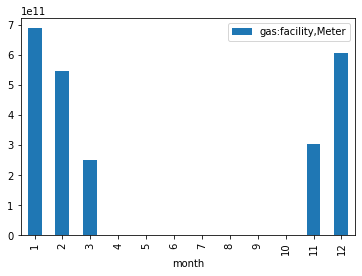

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df3.plot.bar(x=None,y='gas:facility,Meter')